# DATA Analysis

In [1]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
import array
import math

In [2]:
rho_vs_J_v_x = pd.read_csv("rho_vs_J_v_x0_mean_v_x1_mean_L100_beta0.2.csv")
rho_vs_J_v_y = pd.read_csv("rho_vs_J_v_y0_mean_v_y1_mean_L100_beta0.2.csv")

In [3]:
rho_vs_J_v_x.head(5)

,rho,J,v_x0_mean,v_x1_mean
0,0.02,0.019718,0.985932,0.985915
1,0.05,0.047804,0.956070,0.956077
2,0.10,0.090278,0.902760,0.902774
3,0.15,0.127586,0.850571,0.850568
4,0.20,0.159784,0.798904,0.798917


In [4]:
rho_vs_J_v_y.head(5)

,rho,J,v_y0_mean,v_y1_mean
0,0.02,0.019089,0.954417,0.954434
1,0.05,0.018071,0.903554,0.903563
2,0.10,0.016533,0.826662,0.826683
3,0.15,0.015211,0.760576,0.760489
4,0.20,0.014089,0.704448,0.704459


In [5]:
rho = rho_vs_J_v_x['rho']

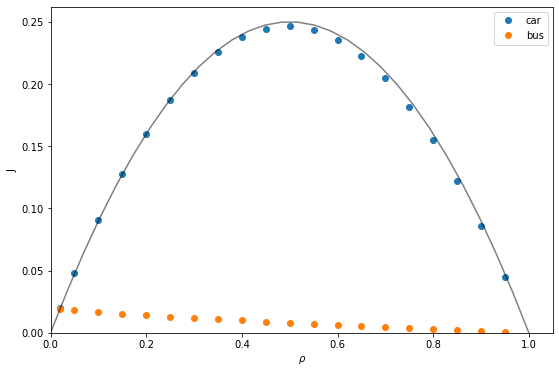

In [6]:
from cProfile import label
from turtle import color


plt.figure(figsize=(9,6))
plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['J'], linestyle='None', marker='o', label='car')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['J'], linestyle='None', marker='o', label='bus')
x=np.linspace(0,1,30)
plt.plot(x, x*(1-x), color='k', alpha=0.5)
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')
plt.legend()

plt.show()

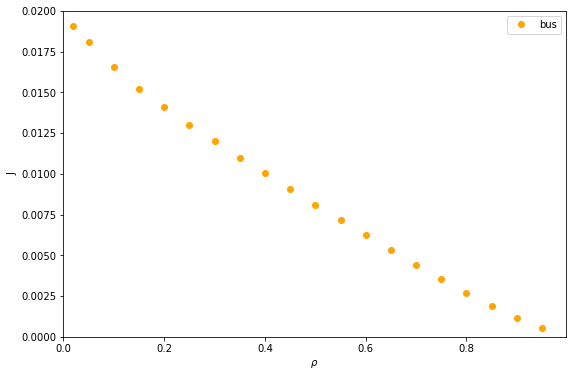

In [7]:
plt.figure(figsize=(9,6))
# plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['J'], linestyle='None', marker='o')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['J'], linestyle='None', marker='o', color='orange', label='bus')
x=np.linspace(0,1,30)

plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('J')
plt.legend()

plt.show()

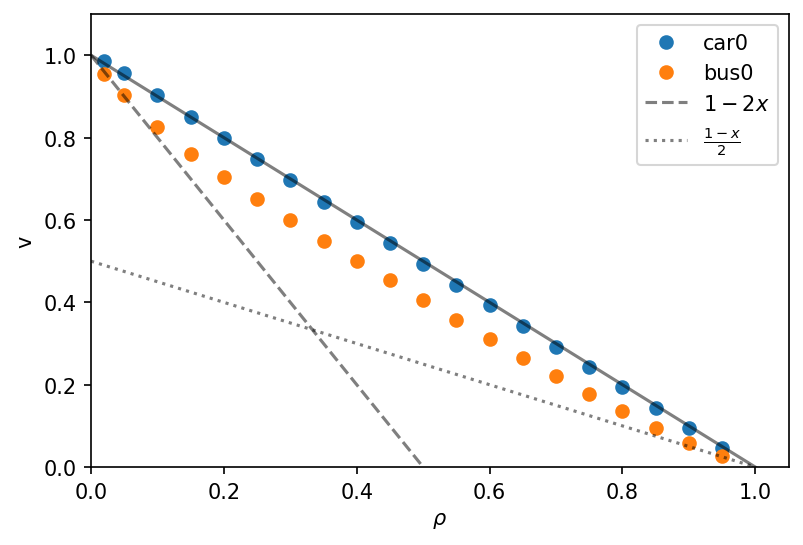

In [8]:
plt.figure(dpi=150)
plt.plot(rho_vs_J_v_x['rho'], rho_vs_J_v_x['v_x0_mean'], linestyle='None', marker='o', label='car0')
plt.plot(rho_vs_J_v_y['rho'], rho_vs_J_v_y['v_y0_mean'], linestyle='None', marker='o', label='bus0')
x=np.linspace(0,1,11)
plt.plot(x, 1-x, color='k', alpha=0.5)
plt.plot(x, 1-2*x, "--", color='k', alpha=0.5, label=r'$1-2x$')
plt.plot(x, (1-x)/2, ":", color='k', alpha=0.5, label=r'$\frac{1-x}{2}$')
plt.xlim(0,)
plt.ylim(0,)
plt.xlabel(r'$\rho$')
plt.ylabel('v')
plt.legend()

plt.show()

# Velocity Distribution

In [9]:
d1 = dt.fread('t_N_vs_y0_L100_beta0.2.csv')
d2 = dt.fread('t_N_vs_y1_L100_beta0.2.csv')
d1 = d1.to_pandas()
d2 = d2.to_pandas()

In [10]:
d3 = dt.fread('t_N_vs_x0_L100_beta0.2.csv')
d4 = dt.fread('t_N_vs_x1_L100_beta0.2.csv')
d3 = d3.to_pandas()
d4 = d4.to_pandas()

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
d1.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2,3,3,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0
3,3,3,3,0,3,1,0,0,0,2,4,0,0,0,0,0,1,0,0,1,0
4,4,5,4,1,4,1,0,0,0,2,4,0,0,1,0,0,1,1,1,1,0
5,5,6,4,3,4,1,0,1,0,2,4,0,0,1,0,0,1,1,1,1,0
6,6,6,6,3,4,1,0,2,1,2,4,0,0,2,0,1,1,1,1,1,0
7,7,6,7,4,5,1,0,2,1,2,4,1,0,2,1,1,1,2,1,1,0
8,8,7,8,4,5,1,1,2,1,3,4,2,0,2,1,2,1,3,1,1,0
9,9,8,8,4,7,1,1,2,1,3,4,3,0,2,1,2,1,3,1,1,0


In [13]:
d2.head(10)

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,7,14,58,89,33,70,33,55,2,13,53,20,39,24,69,37,10,28,81,43
1,1,7,15,59,91,36,71,34,55,2,14,53,20,40,25,69,38,10,28,81,43
2,2,8,15,60,91,37,71,35,55,3,14,55,20,40,26,70,39,10,28,82,43
3,3,9,17,60,91,38,71,35,56,3,14,56,20,40,27,70,39,11,28,82,43
4,4,11,17,60,91,39,72,37,57,5,16,56,20,40,27,71,40,12,28,82,43
5,5,11,17,60,91,40,73,38,58,6,17,56,20,41,27,71,42,12,28,82,43
6,6,11,17,61,92,41,74,40,58,7,17,57,20,41,27,71,43,12,28,82,43
7,7,13,17,62,93,41,77,40,58,7,17,57,20,41,27,72,43,12,28,82,43
8,8,14,19,63,93,43,78,40,58,8,17,57,20,43,27,72,43,12,29,82,43
9,9,14,19,63,94,45,79,40,59,9,17,57,20,44,27,72,43,12,30,82,43


In [14]:
d3

,t,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,2,1,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
2,2,1,3,2,2,2,0,0,3,0,0,1,1,1,1,1,1,1,0,0,0
3,3,3,4,2,3,3,1,1,3,1,1,2,1,1,1,1,1,1,0,0,0
4,4,3,6,2,4,4,1,2,3,2,2,2,1,1,2,1,1,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,999996,985927,956068,902754,850567,798903,747186,695994,644577,594116,543551,492880,442455,392470,342595,292336,242537,193280,144005,95375,47174
999997,999997,985928,956069,902756,850567,798903,747187,695995,644578,594117,543552,492880,442456,392472,342596,292336,242537,193280,144005,95375,47174
999998,999998,985928,956069,902757,850567,798903,747188,695996,644580,594117,543552,492881,442456,392472,342596,292336,242537,193280,144005,95375,47174
999999,999999,985930,956069,902759,850570,798903,747189,695997,644580,594117,543554,492881,442456,392472,342597,292336,242537,193280,144005,95376,47174


In [15]:
df_distance = d2-d1
df_distance = df_distance.drop('t', axis=1)
# df_distance = pd.concat([df_t, df_distance], axis=1)
df_distance

,2,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
0,7,14,58,89,33,70,33,55,2,13,53,20,39,24,69,37,10,28,81,43
1,6,13,59,90,36,71,34,55,1,14,53,20,40,25,69,38,10,28,80,43
2,5,12,60,90,37,71,35,55,2,13,55,20,40,26,70,38,10,28,81,43
3,6,14,60,88,37,71,35,56,1,10,56,20,40,27,70,38,11,28,81,43
4,6,13,59,87,38,72,37,57,3,12,56,20,39,27,71,39,11,27,81,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999996,24,22,79,4,45,28,95,66,98,72,99,54,61,73,1,55,32,81,58,37
999997,24,23,79,2,46,30,96,66,97,72,98,54,61,73,1,55,32,81,58,37
999998,22,23,79,2,45,30,95,65,98,72,97,54,62,74,1,55,32,81,58,37
999999,24,24,79,1,44,31,95,65,97,72,97,54,62,74,1,55,32,81,58,37


In [16]:
plt.figure()
df_distance.plot(subplots=True, figsize=(200,200), layout=(20,1), sharex=True, sharey=True, linestyle='None', marker='o', markersize=1)
plt.savefig('bus_distance.png')
plt.close('all')
# plt.show()

In [17]:
def xt_dt2vt(xt, dt):
    dx = xt.diff(dt)
    vt = dx/dt

    return(vt[dt:])

- $N=20$

In [18]:
var_vt_4 =    np.var(xt_dt2vt(d1['20'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['20'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['20'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['20'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['20'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['20'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['20'],1000))

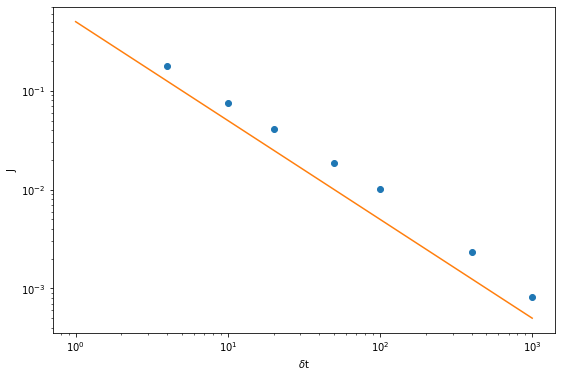

In [19]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=50$

In [20]:
var_vt_4 =    np.var(xt_dt2vt(d1['50'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['50'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['50'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['50'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['50'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['50'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['50'],1000))

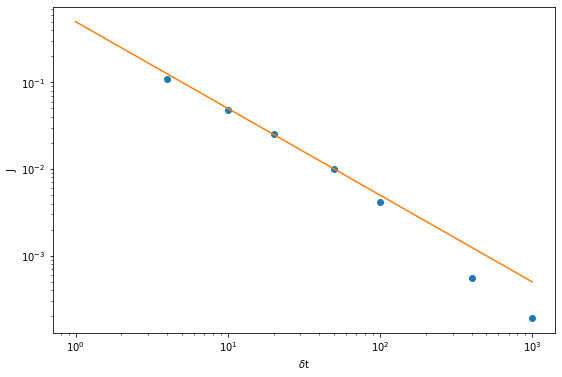

In [21]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.5/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

- $N=90$

In [22]:
var_vt_4 =    np.var(xt_dt2vt(d1['90'],4))
var_vt_10 =   np.var(xt_dt2vt(d1['90'],10))
var_vt_20 =   np.var(xt_dt2vt(d1['90'],20))
var_vt_50 =   np.var(xt_dt2vt(d1['90'],50))
var_vt_100 =  np.var(xt_dt2vt(d1['90'],100))
var_vt_400 =  np.var(xt_dt2vt(d1['90'],400))
var_vt_1000 = np.var(xt_dt2vt(d1['90'],1000))

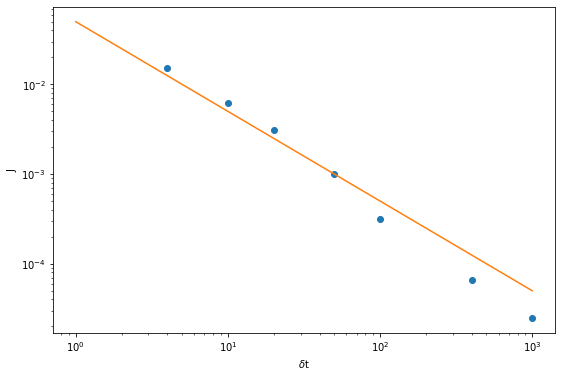

In [23]:
ts = [4,10,20,50,100,400,1000]
var_vts = [var_vt_4,var_vt_10,var_vt_20,var_vt_50,var_vt_100,var_vt_400,var_vt_1000]

plt.figure(figsize=(9,6))
plt.plot(ts, var_vts, linestyle='None', marker='o')
x=np.linspace(1,1000,30)
plt.plot(x, 0.05/x)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\delta$t')
plt.ylabel('J')

plt.show()

## Corr

In [24]:
def x01_dt2corr_v01(x0,x1,dt):
    dx0=x0.diff(dt)[dt:]
    dx1=x1.diff(dt)[dt:]
    corr=np.corrcoef(dx0,dx1)

    return(corr[0,1])

- $N=2$

In [25]:
j='2'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

In [26]:
corr_v_4

-0.2706326837327617

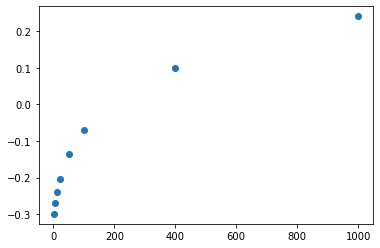

In [27]:
ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=5$

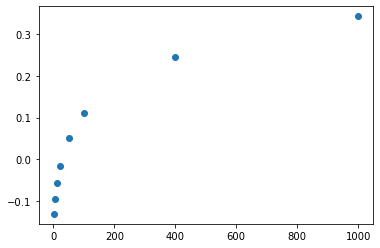

In [28]:
j='5'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=10$

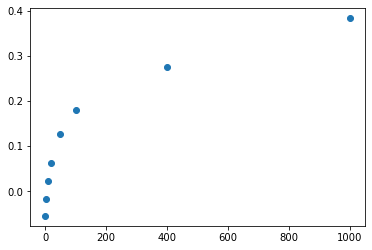

In [29]:
j='10'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=20$

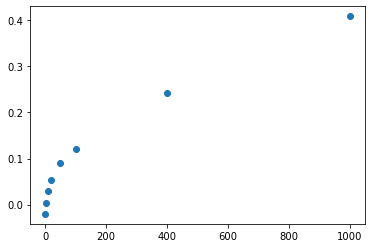

In [30]:
j='20'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=50$

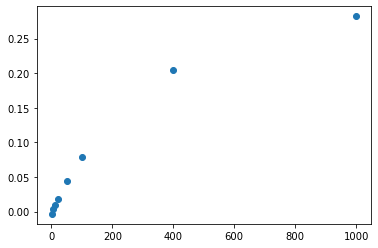

In [31]:
j='50'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

- $N=90$

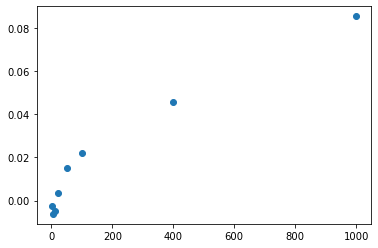

In [32]:
j='90'
corr_v_1   =x01_dt2corr_v01(d1[j],d2[j],1)
corr_v_4   =x01_dt2corr_v01(d1[j],d2[j],4)
corr_v_10  =x01_dt2corr_v01(d1[j],d2[j],10)
corr_v_20  =x01_dt2corr_v01(d1[j],d2[j],20)
corr_v_50  =x01_dt2corr_v01(d1[j],d2[j],50)
corr_v_100 =x01_dt2corr_v01(d1[j],d2[j],100)
corr_v_400 =x01_dt2corr_v01(d1[j],d2[j],400)
corr_v_1000=x01_dt2corr_v01(d1[j],d2[j],1000)

ts=[1,4,10,20,50,100,400,1000]
corr_vts=[corr_v_1,corr_v_4,corr_v_10,corr_v_20,corr_v_50,corr_v_100,corr_v_400,corr_v_1000]

plt.plot(ts,corr_vts, linestyle='None', marker='o')
plt.show()

## Diffusion constant

In [33]:
def diffusion(xt, dt):
    dx = np.var(xt.diff(dt))
    diff = dx/dt

    return diff

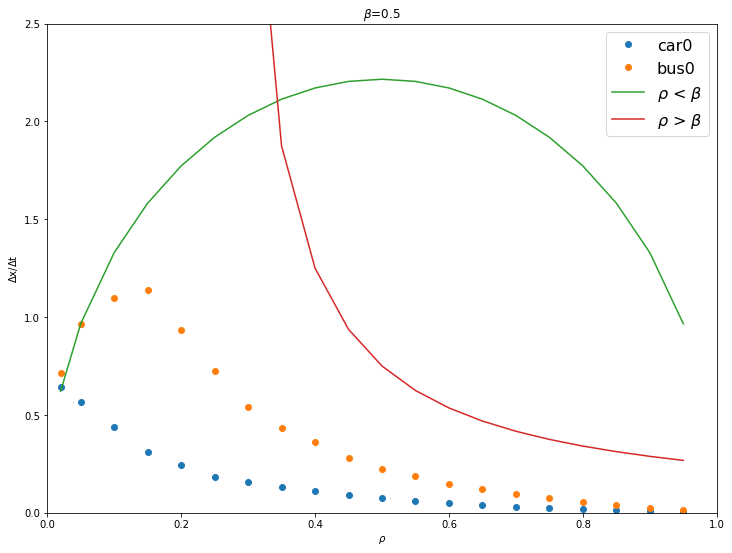

In [34]:
delta_y = []
for i in range(1,21):
    d = diffusion(d1.iloc[:,i],400)
    delta_y.append(d)

delta_x = []
for i in range(1,21):
    d = diffusion(d3.iloc[:,i],400)
    delta_x.append(d)


b = 0.25
L = 100

plt.figure(figsize=(12,9))
plt.plot(rho, delta_x, linestyle='None', marker='o', label='car0')
plt.plot(rho, delta_y, linestyle='None', marker='o', label='bus0')

plt.plot(rho, np.sqrt(L*math.pi*(rho-np.square(rho)))/4, label=r'$\rho$ < $\beta$')
plt.plot(rho, b*(1-b)/(rho-b), label=r'$\rho$ > $\beta$')
# plt.yscale('log')
# plt.xscale('log')
plt.xlim(0,1)
plt.ylim(0,2.5)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\Delta$x/$\Delta$t')
plt.title(r'$\beta$=0.5')
plt.legend(fontsize=16)
# plt.savefig('beta0.2.png', dpi=600)

plt.show()